# Support Vector Machines (SVM)

**The Core Idea:** Find the best boundary (hyperplane) that separates the data classes with the **widest margin**.

- **Support Vectors:** The data points closest to the hyperplane. These are the critical points; if you move other points, the boundary doesn't change. If you move these, it does.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Helper function to visualize decision boundaries
def plot_decision_boundary(X, y, model, title):
    plt.figure(figsize=(8, 6))
    
    # Create a meshgrid to plot the decision surface
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

## Linear SVM (The Hard Margin)
We'll use a subset of the Iris dataset to visualize a simple linear separation.

- Iris Dataset - 150 samples of iris flowers from three species (Setosa, Versicolor, Virginica), with four features measured for each: sepal length/width and petal length/width, used to classify the flowers by species.

['setosa' 'versicolor' 'virginica']


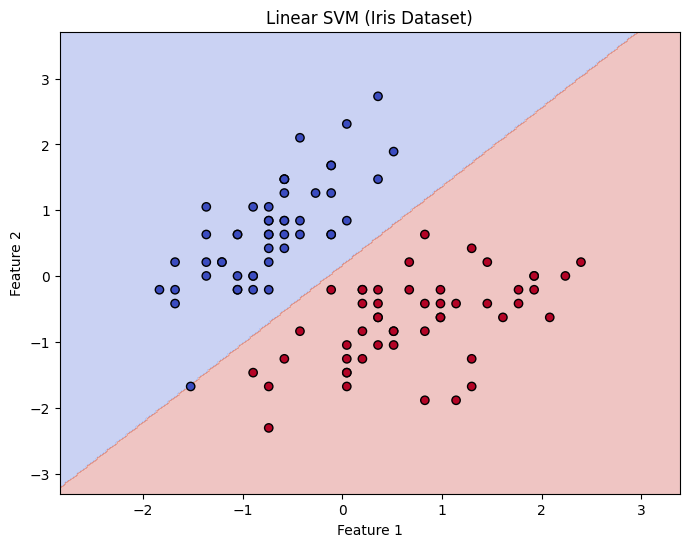

In [ ]:
# Load Iris dataset
iris = datasets.load_iris()

# We only take the first two features and two classes for easy visualization
X = iris.data[:100, :2]  
y = iris.target[:100]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Usage of Linear Kernel
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X_scaled, y)

plot_decision_boundary(X_scaled, y, linear_svm, "Linear SVM (Iris Dataset)")

## Non-Linear Data & The Kernel Trick
What if the data cannot be separated by a straight line? 

Let's look at the **Make Circles** dataset. A linear line will fail miserably here.

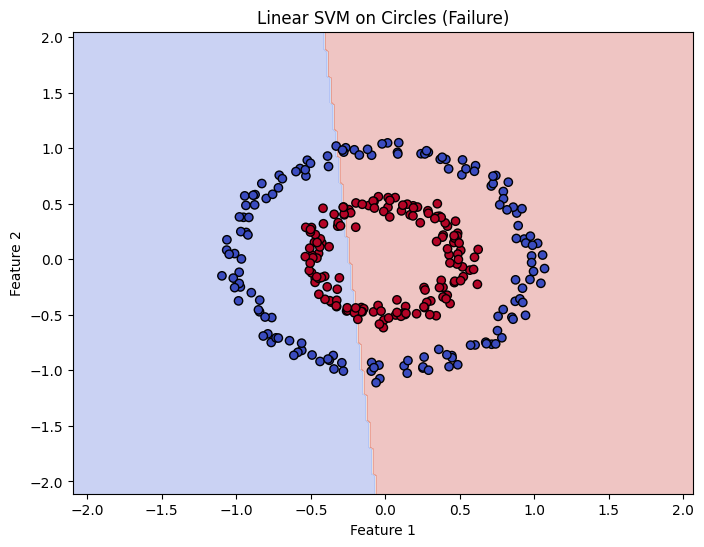

In [3]:
from sklearn.datasets import make_circles

# Generate Concentric Circles
X_circles, y_circles = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Try Linear SVM
linear_fail = SVC(kernel='linear')
linear_fail.fit(X_circles, y_circles)

plot_decision_boundary(X_circles, y_circles, linear_fail, "Linear SVM on Circles (Failure)")

### Enter the Radial Basis Function (RBF) Kernel
The "Kernel Trick" projects the data into a higher dimension (3D) where it *is* linearly separable, and then projects the decision back down to 2D. 

Imagine lifting the inner blue dots up in the air; you can then slide a flat sheet of paper under them to separate them from the red dots.

Each point is projected to a 3D point using the function $\phi(x)$ to transform it into a higher dimension using gaussian similarity function.

$$\phi(x) = \exp(-\gamma\|x-x_i\|^2)$$

Decision function is given by:

$$f(x) = \sum_{i} \alpha_i y_i K(x_i, x) + b$$



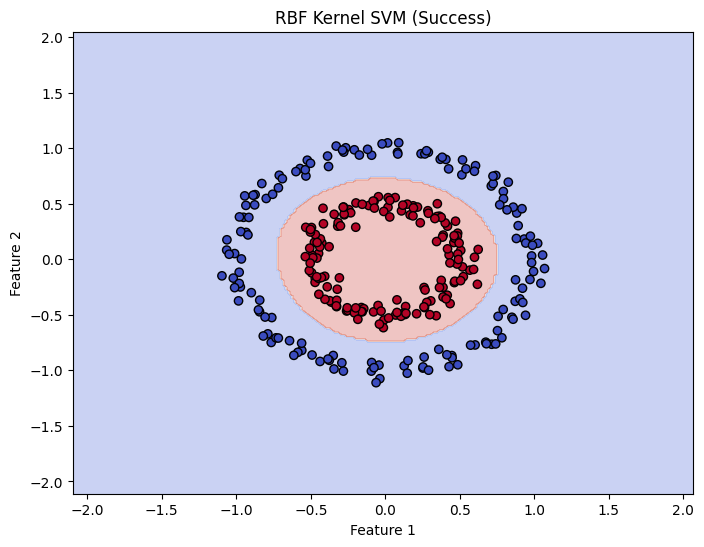

In [4]:
# Use RBF Kernel
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale')
rbf_svm.fit(X_circles, y_circles)

plot_decision_boundary(X_circles, y_circles, rbf_svm, "RBF Kernel SVM (Success)")

## Hyperparameters: C and Gamma
- **C (Regularization):** 
    - **Small C:** "Soft Margin". Allows some misclassifications to find a wider street. Good for noisy data.
    - **Large C:** "Hard Margin". Tries strictly to not miss any point. Can overfit.
- **Gamma (Kernel Coefficient):** 
    - **Small Gamma:** "Far reach". The decision boundary is smoother. (Underfitting)
    - **Large Gamma:** "Close reach". The boundary wraps tightly around data points (can lead to islands). (Overfitting)